In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
smbMean = np.array(   [-5000., -4000., -3000., -2000.,   -50.,   0.1, 1000., 2000., -400.])
smbAnomaly = np.array([-1000.,  -700.,  -500.,  -100.,   100.,  100.,  200.,  300.,   46.])
smbAnomalySumError = 246.

abl_density = 800.
acc_density = 600.
abl_density_hi = 900.
abl_density_lo = 700.
acc_density_hi = 900.
acc_density_lo = 300.

array([ True,  True,  True,  True, False,  True,  True,  True, False])

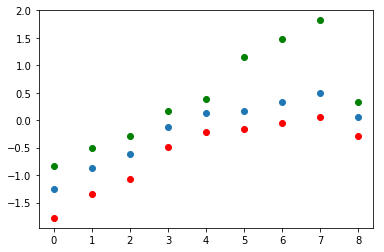

In [33]:
# ALGORITHM 1: account for where values are +ive/-ive and push them in the appropriate directions (this doesn't always work)
smbAnomaly_hi = np.where(smbAnomalySumError<=0., smbAnomaly - smbAnomalySumError, 0.) + np.where(smbAnomalySumError> 0., smbAnomaly + smbAnomalySumError, 0.)
smbAnomaly_lo = np.where(smbAnomalySumError<=0., smbAnomaly + smbAnomalySumError, 0.) + np.where(smbAnomalySumError> 0., smbAnomaly - smbAnomalySumError, 0.)

smbAnomaly_dh = np.where(smbMean<=0., smbAnomaly/abl_density, 0.) + np.where(smbMean> 0., smbAnomaly/acc_density, 0.)
smbAnomaly_hi_dh = np.where(smbMean<=0., smbAnomaly_hi/abl_density_hi, 0.) + np.where(smbMean> 0., smbAnomaly_hi/acc_density_lo, 0.)
smbAnomaly_lo_dh = np.where(smbMean<=0., smbAnomaly_lo/abl_density_lo, 0.) + np.where(smbMean> 0., smbAnomaly_lo/acc_density_hi, 0.)

plt.plot(smbAnomaly_dh, 'o')
plt.plot(smbAnomaly_hi_dh, 'go')
plt.plot(smbAnomaly_lo_dh, 'ro')

np.abs(smbAnomaly_hi_dh-smbAnomaly_lo_dh)/2. > \
np.where(smbMean<=0., smbAnomalySumError/abl_density, 0.) + np.where(smbMean> 0., smbAnomalySumError/acc_density, 0.)


In [32]:
# ALGORITHM 2: calculate all of the different combinations of hi/lo anomaly + hi/lo densities
smbAnomaly_hi = smbAnomaly + smbAnomalySumError
smbAnomaly_lo = smbAnomaly - smbAnomalySumError

smbAnomaly_hi_hihi_dh = np.where(smbMean<=0., smbAnomaly_hi/abl_density_hi, 0.) + np.where(smbMean>0., smbAnomaly_hi/acc_density_hi, 0.)
smbAnomaly_hi_lolo_dh = np.where(smbMean<=0., smbAnomaly_hi/abl_density_lo, 0.) + np.where(smbMean>0., smbAnomaly_hi/acc_density_lo, 0.)
smbAnomaly_hi_hilo_dh = np.where(smbMean<=0., smbAnomaly_hi/abl_density_hi, 0.) + np.where(smbMean>0., smbAnomaly_hi/acc_density_lo, 0.)
smbAnomaly_hi_lohi_dh = np.where(smbMean<=0., smbAnomaly_hi/abl_density_lo, 0.) + np.where(smbMean>0., smbAnomaly_hi/acc_density_hi, 0.)

smbAnomaly_lo_hihi_dh = np.where(smbMean<=0., smbAnomaly_lo/abl_density_hi, 0.) + np.where(smbMean>0., smbAnomaly_lo/acc_density_hi, 0.)
smbAnomaly_lo_lolo_dh = np.where(smbMean<=0., smbAnomaly_lo/abl_density_lo, 0.) + np.where(smbMean>0., smbAnomaly_lo/acc_density_lo, 0.)
smbAnomaly_lo_hilo_dh = np.where(smbMean<=0., smbAnomaly_lo/abl_density_hi, 0.) + np.where(smbMean>0., smbAnomaly_lo/acc_density_lo, 0.)
smbAnomaly_lo_lohi_dh = np.where(smbMean<=0., smbAnomaly_lo/abl_density_lo, 0.) + np.where(smbMean>0., smbAnomaly_lo/acc_density_hi, 0.)

smbAnomaly_combos = np.vstack( (smbAnomaly_hi_hihi_dh, smbAnomaly_hi_lolo_dh, smbAnomaly_hi_hilo_dh, smbAnomaly_hi_lohi_dh, \
                                smbAnomaly_lo_hihi_dh, smbAnomaly_lo_lolo_dh, smbAnomaly_lo_hilo_dh, smbAnomaly_lo_lohi_dh))

(np.amax(smbAnomaly_combos, axis=0) - np.amin(smbAnomaly_combos, axis=0)) / 2. > \
np.where(smbMean<=0., smbAnomalySumError/abl_density, 0.) + np.where(smbMean> 0., smbAnomalySumError/acc_density, 0.)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [57]:
# ALGORITHM 3: add a percent error on top of the smbAnomalySumError
density_percentError = np.where(smbMean<=0., (abl_density_hi-abl_density_lo)/abl_density, 0.) + np.where(smbMean>0., (acc_density_hi-acc_density_lo)/acc_density, 0.)
smbAnomalySumError + smbAnomalySumError * density_percentError > \
np.where(smbMean<=0., smbAnomalySumError/abl_density, 0.) + np.where(smbMean> 0., smbAnomalySumError/acc_density, 0.)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])